In [144]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%warnings.filterwarnings("ignore", category=DeprecationWarning)

UsageError: Line magic function `%warnings.filterwarnings("ignore",` not found.


In [145]:
# Importing Data
dataset = pd.read_csv("D:\Becode_Projects\Chrun-Prediction\churn_prediction.csv")
dataset.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


About Features in data

CLIENTNUM : Client number. Unique identifier for the customer holding the account
Attrition_Flag : Internal event (customer activity) variable - if the account is closed then 1 else 0
Customer_Age : Demographic variable - Customer's Age in Years
Gender : Demographic variable - M=Male, F=Female
Dependent_count : Demographic variable - Number of dependents
Education_Level : Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
Marital_Status : Demographic variable - Married, Single, Divorced, Unknown
Income_Category : Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, >)
Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
Months_on_book : Period of relationship with bank
Total_Relationship_Count : Total no. of products held by the customer
Months_Inactive_12_mon : No. of months inactive in the last 12 months
Contacts_Count_12_mon : No. of Contacts in the last 12 months
Credit_Limit : Credit Limit on the Credit Card
Total_Revolving_Bal : Total Revolving Balance on the Credit Card
Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
Total_Trans_Amt : Total Transaction Amount (Last 12 months)
Total_Trans_Ct : Total Transaction Count (Last 12 months)
Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
Avg_Utilization_Ratio : Average Card Utilization Ratio

In [146]:
dataset.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [147]:
dataset.shape

(10127, 21)

In [148]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [149]:
dataset.isna().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

Exploratory Data Analysis

In [150]:
# Defining plot design
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    #plt.grid(b=None)

Categorical Variables

C:\Users\sheet\AppData\Local\Temp\ipykernel_38472\1683469029.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i[0]+1)


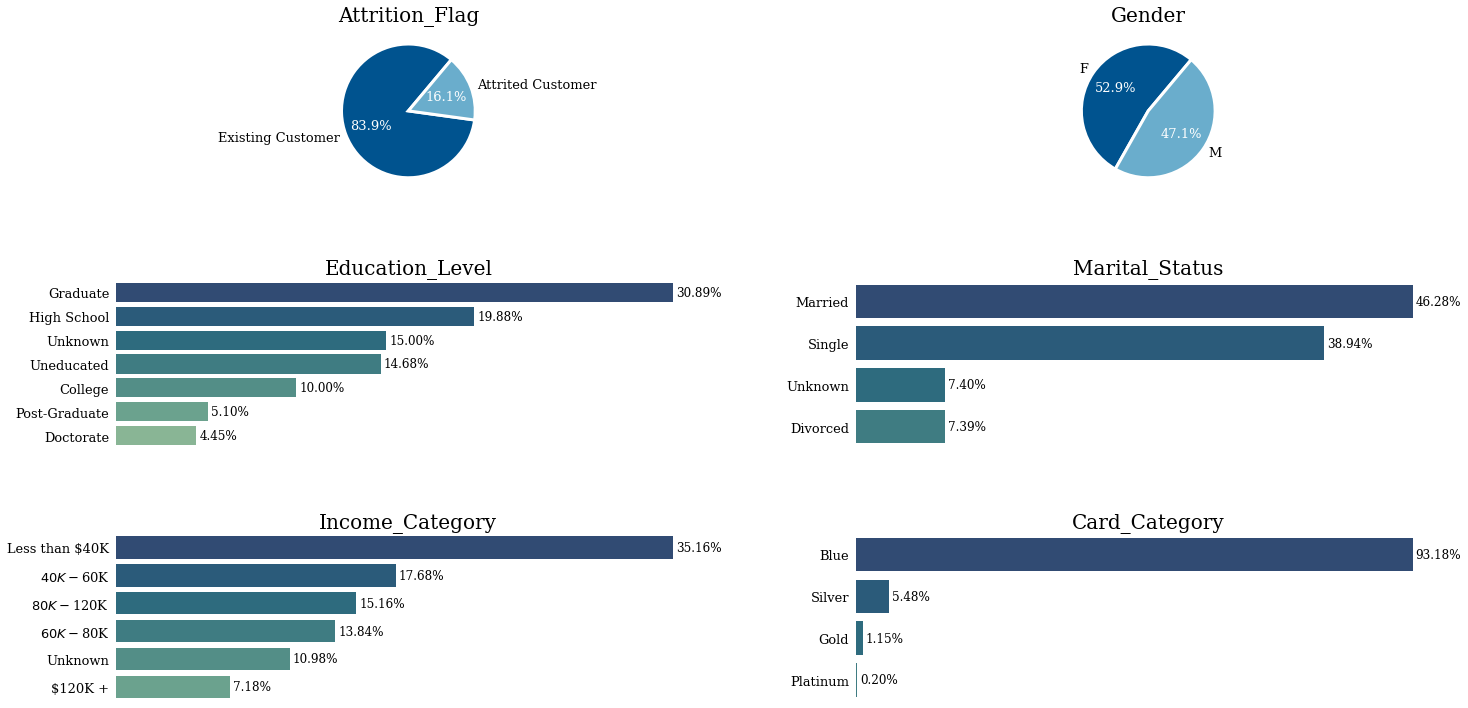

In [173]:
import matplotlib as mpl

# Select categorical variables
categ = dataset.select_dtypes(include=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(22, 22))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = ['serif']

mpl.rcParams['font.size'] = 13
fig.subplots_adjust(left=0.5, right=0.9, bottom=0.5, top=0.9)
fig.tight_layout()

colors = sns.color_palette("crest_r", n_colors=7).as_hex()

# Loop columns
for i in (enumerate(categ)):
    plt.subplot(6, 2, i[0]+1)
    
    if dataset[i[1]].value_counts().count() > 2:
        ax = sns.countplot(y = i[1], data = dataset, order=dataset[i[1]].value_counts().index, palette=colors)
        pct = dataset[i[1]].value_counts(ascending=False, normalize=True).values * 100
        ax.bar_label(container=ax.containers[0], labels=list(map('{:.2f}%'.format,pct)), padding=3, size=12, color='black')

        
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.set_xticklabels('')
        plot_design()

    else:
        _, texts, pcts = plt.pie(
            dataset[i[1]].value_counts(), 
            labels=dataset[i[1]].value_counts().index, 
            colors= ['#00538F', '#6AADCC'],
            autopct='%1.1f%%', 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            startangle=50)
        for pcts in pcts:
          pcts.set_color('white')
        plt.title(i[1], fontsize=20, color='black')

C:\Users\sheet\AppData\Local\Temp\ipykernel_38472\612840976.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,2, i[0]+1)


ValueError: num must be 1 <= num <= 14, not 15

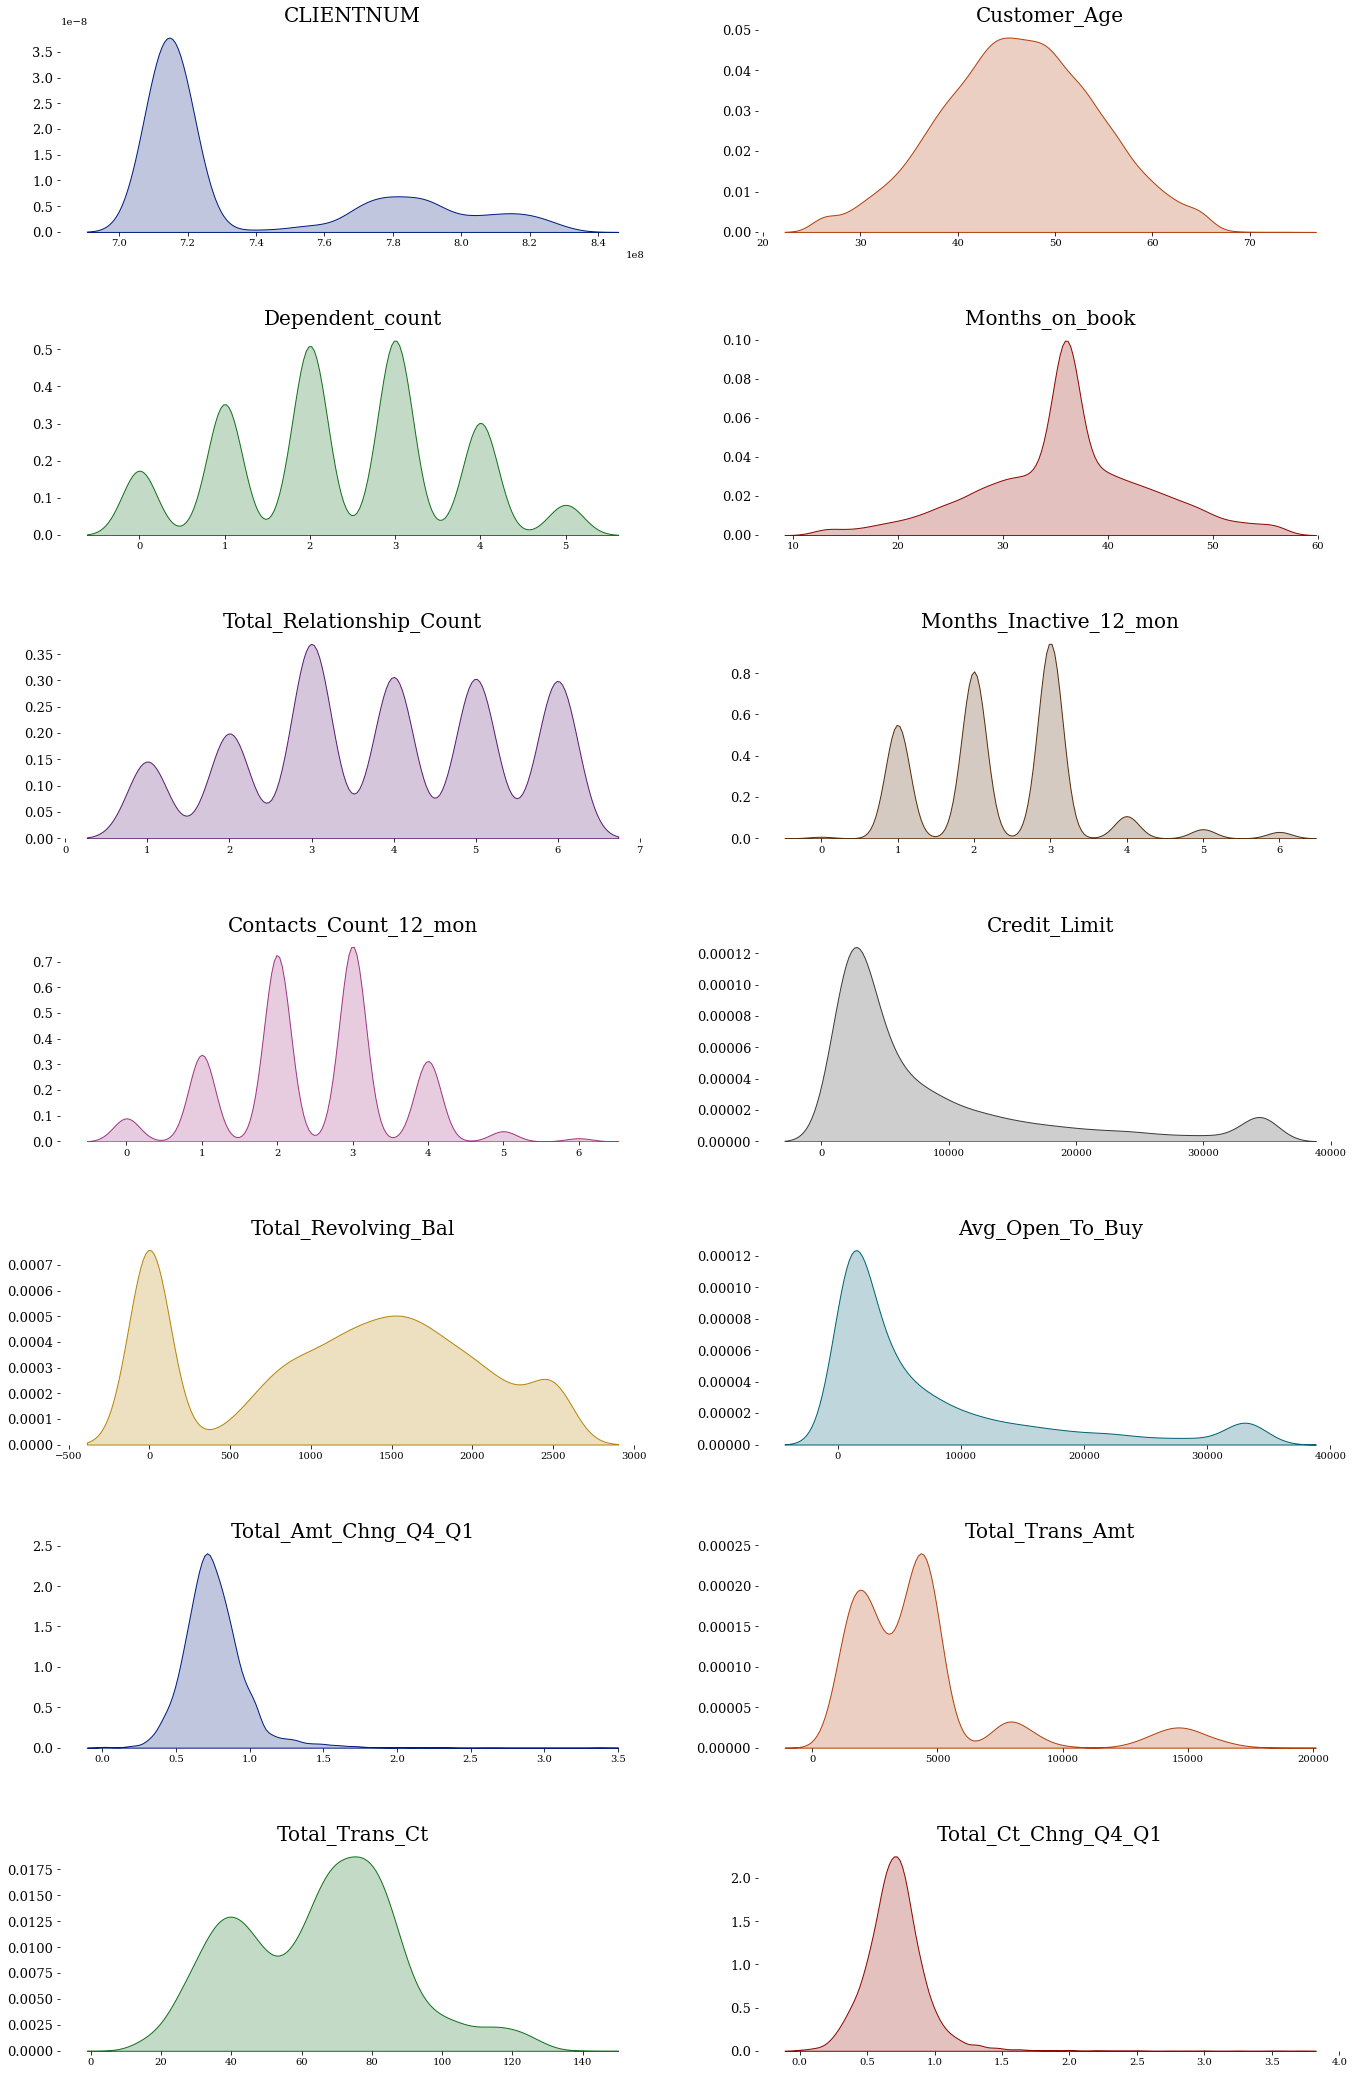

In [176]:
# Select numerical variables
import warnings
numeric = dataset.select_dtypes(exclude=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(20, 30))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.size'] = 10

colors = sns.color_palette("dark", n_colors=14).as_hex()

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(7,2, i[0]+1)
    sns.kdeplot(x = i[1], data = dataset, color=colors[i[0]], fill=True)
    #plt.grid(b=None)
    plot_design()

Average Transaction Amount : 4404.086303939963


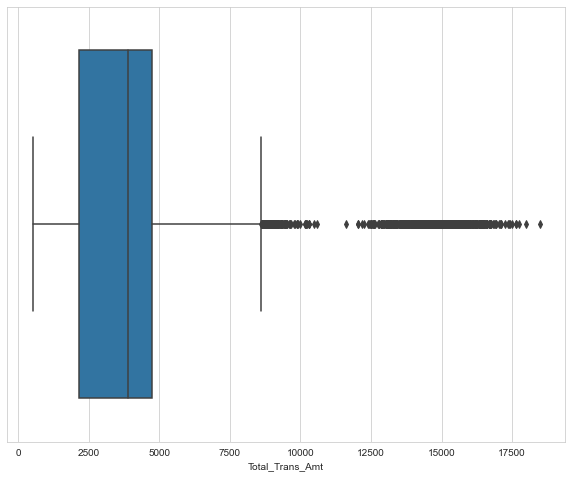

In [177]:
# boxplot
# the transaction amount is left-skewed Mean < Median < Mode
# with outliers amounts
print("Average Transaction Amount : {}".format(dataset.Total_Trans_Amt.mean()))
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(data = dataset, x = "Total_Trans_Amt")
plt.show()
plt.close()

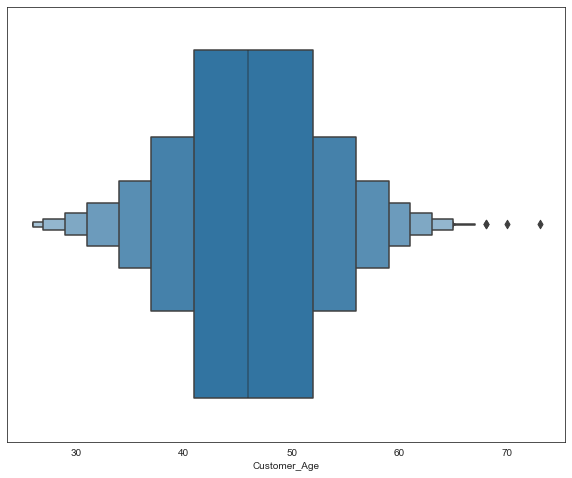

In [178]:
# boxenplot
# customer age is right skewed means Mode < Median < Mean with few outliers
sns.set_style("white")
plt.figure(figsize=(10,8))
sns.boxenplot(data = dataset, x = "Customer_Age")
plt.show()
plt.close()

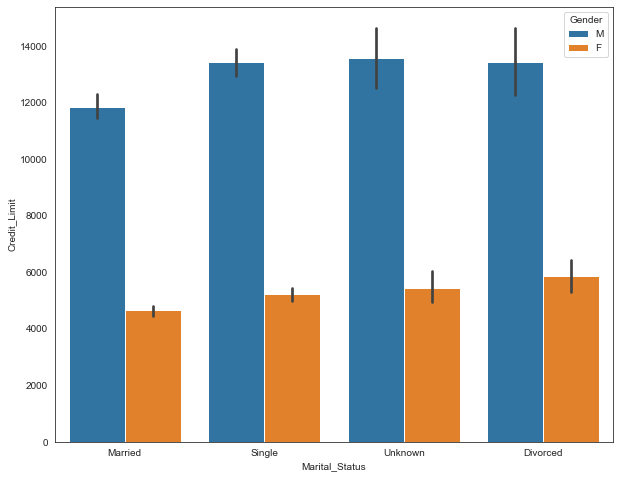

In [179]:
# barplot - marital status, credit limit and gender
# in all marital status the number of female count is less and credit limit is more to male and less to female
plt.figure(figsize=(10,8))
sns.barplot(data = dataset,x = 'Marital_Status',y = 'Credit_Limit',hue = 'Gender')
plt.show()
plt.close()

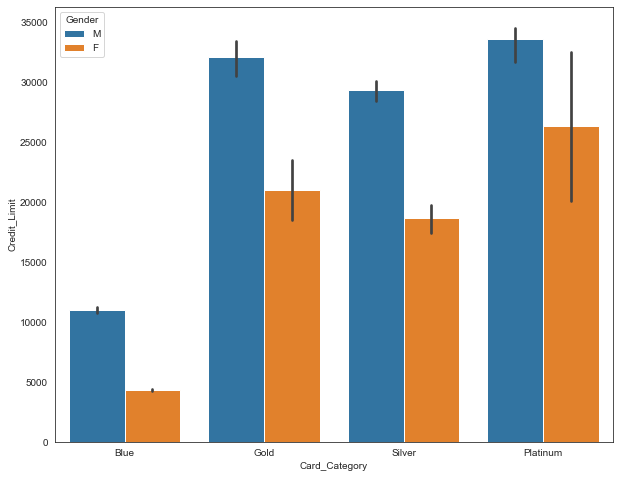

In [182]:
# barplot card category, credit limit and gender
# customers holding gold, silver and platinum more than blue
# still credit limit is less for female
plt.figure(figsize=(10,8))
sns.barplot(data = dataset,x = 'Card_Category',y = 'Credit_Limit',hue = 'Gender')
plt.show()
plt.close()